# 都道府県別の感染者数の統計

## 2020年10月10日時点のデータ

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import japanize_matplotlib 
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/week3/population.csv

In [ ]:
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/week3/patients.csv

In [7]:
df1 = pd.read_csv('population.csv', encoding='utf-8')
df2 = pd.read_csv('patients.csv', encoding='utf-8')
covid = pd.merge(df1, df2, on='Prefecture')
covid.head(10)

,Prefecture,Population,Cases
0,北海道,5320000,2323
1,青森県,1278000,37
2,岩手県,1255000,24
3,宮城県,2323000,474
4,秋田県,996000,58
5,山形県,1102000,81
6,福島県,1882000,302
7,茨城県,2892000,706
8,栃木県,1957000,445
9,群馬県,1960000,755


In [9]:
# 都道府県別10万人あたりの感染者数
covid['Rate'] = covid['Cases']*100000/covid['Population']
covid.sort_values('Rate', ascending=False).head(10)

,Prefecture,Population,Cases,Rate
12,東京都,13724000,27569,200.881667
46,沖縄県,1443000,2729,189.119889
26,大阪府,8823000,11109,125.909555
39,福岡県,5107000,5101,99.882514
13,神奈川県,9159000,7471,81.570040
22,愛知県,7525000,5504,73.142857
25,京都府,2599000,1809,69.603694
10,埼玉県,7310000,5051,69.097127
11,千葉県,6246000,4268,68.331732
16,石川県,1147000,780,68.003487


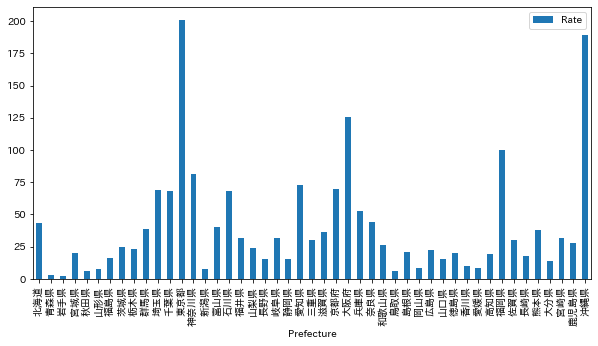

In [10]:
# 棒グラフ
covid.plot.bar(x='Prefecture', y=['Rate'], figsize=(10,5));

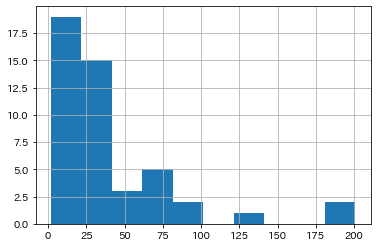

In [12]:
# ヒストグラム
covid['Rate'].hist(bins=10);

In [13]:
# 記述統計
covid['Rate'].describe()

count     47.000000
mean      39.846369
std       42.381414
min        1.912351
25%       15.394204
50%       26.349206
75%       43.902440
max      200.881667
Name: Rate, dtype: float64

In [14]:
#平均値, 中央値, 偏差, 最小, 最大
print(covid['Rate'].mean(),covid['Rate'].median(), covid['Rate'].std(), covid['Rate'].min(), covid['Rate'].max())

39.846368632803184 26.349206349206348 42.38141364341987 1.9123505976095618 200.8816671524337


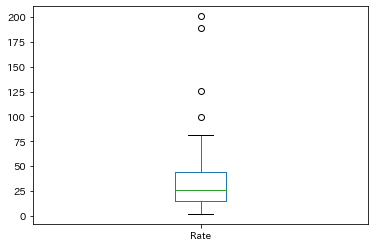

In [15]:
# 箱ヒゲ図
covid['Rate'].plot.box();

In [16]:
# 歪度と尖度
print(covid['Rate'].skew(), covid['Rate'].kurt())

2.4105827339159043 6.456273074172066


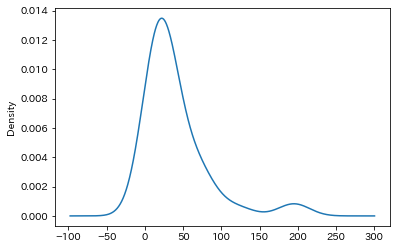

In [17]:
# 分布のカーネル密度推定
covid['Rate'].plot.kde();

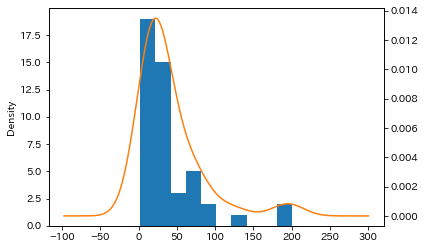

In [20]:
# ヒストグラムと分布
covid["Rate"].plot(kind="hist", bins=10)
covid["Rate"].plot(kind="kde", secondary_y=True);

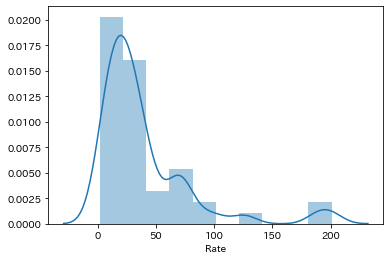

In [21]:
# ヒストグラムと分布
sns.distplot(covid['Rate'], bins=10);

In [22]:
# 相関係数
covid.corr()

,Population,Cases,Rate
Population,1.000000,0.884377,0.693046
Cases,0.884377,1.000000,0.791450
Rate,0.693046,0.791450,1.000000


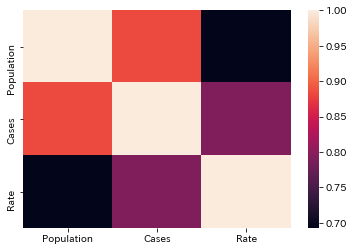

In [23]:
# ヒートマップ
sns.heatmap(data=covid.corr());

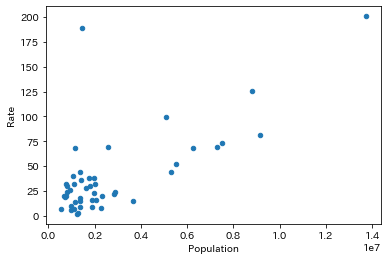

In [24]:
# 散布図
covid.plot.scatter(x='Population', y='Rate');

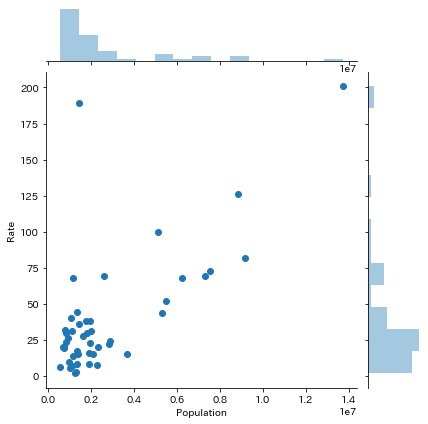

In [25]:
# 散布図
sns.jointplot(x='Population', y='Rate', data=covid);

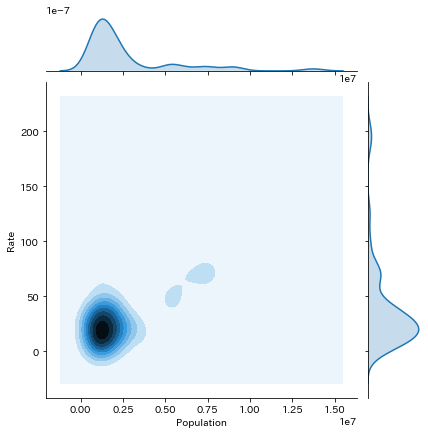

In [26]:
# カーネル密度推定
sns.jointplot(x='Population', y='Rate', data=covid, kind='kde');

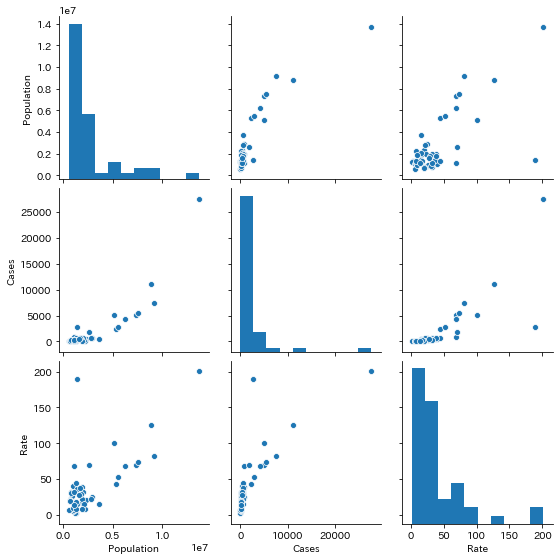

In [27]:
# 散布図
sns.pairplot(data=covid);

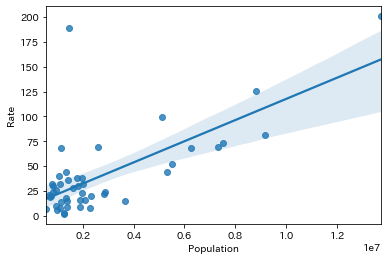

In [28]:
# 回帰直線
sns.regplot(x='Population', y='Rate', data=covid);

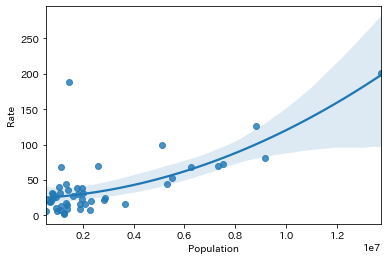

In [29]:
# 回帰曲線（2次の多項式）
sns.regplot(x='Population', y='Rate', data=covid, order=2);

In [30]:
# 都道府県の色分け
covid.loc[covid['Rate'] >= covid['Rate'].quantile(.75), 'color']='red'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.75)) & (covid['Rate'] >= covid['Rate'].quantile(.25)), 'color']='blue'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.25)), 'color']='green'
covid.head()

,Prefecture,Population,Cases,Rate,color
0,北海道,5320000,2323,43.665414,blue
1,青森県,1278000,37,2.895149,green
2,岩手県,1255000,24,1.912351,green
3,宮城県,2323000,474,20.404649,blue
4,秋田県,996000,58,5.823293,green


In [23]:
#!pip install japanmap

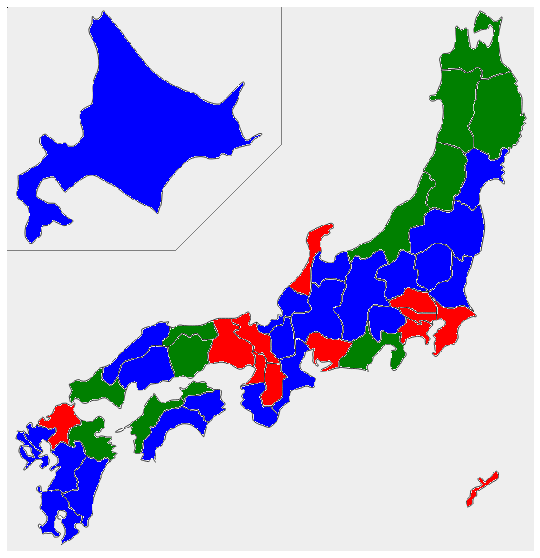

In [31]:
# 地図の可視化
import japanmap as jm
pref_colors={p:c for p, c in zip(covid['Prefecture'].values, covid['color'].values)}
image=jm.picture(pref_colors)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off');